In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequence(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequence(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequence(test_data, dimension=NUM_WORDS)

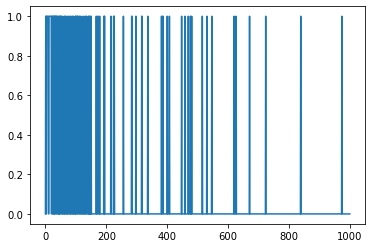

In [3]:
plt.plot(train_data[0])

## Overfitting Example

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")])

baseline_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.5686 - accuracy: 0.7176 - binary_crossentropy: 0.5686 - val_loss: 0.4233 - val_accuracy: 0.8203 - val_binary_crossentropy: 0.4233 - 3s/epoch - 63ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3643 - accuracy: 0.8498 - binary_crossentropy: 0.3643 - val_loss: 0.3447 - val_accuracy: 0.8522 - val_binary_crossentropy: 0.3447 - 353ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3209 - accuracy: 0.8680 - binary_crossentropy: 0.3209 - val_loss: 0.3309 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3309 - 395ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3099 - accuracy: 0.8714 - binary_crossentropy: 0.3099 - val_loss: 0.3286 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3286 - 320ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3046 - accuracy: 0.8744 - binary_crossentropy: 0.3046 - val_loss: 0.3289 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3289 - 302ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3020 - accuracy: 0.8760 - binary_cr

In [6]:
smaller_model = keras.Sequential([keras.layers.Dense(4, activation="relu", input_shape=(NUM_WORDS,)),
keras.layers.Dense(4, activation="relu"),
keras.layers.Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6777 - accuracy: 0.5803 - binary_crossentropy: 0.6777 - val_loss: 0.6465 - val_accuracy: 0.6528 - val_binary_crossentropy: 0.6465 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6072 - accuracy: 0.7152 - binary_crossentropy: 0.6072 - val_loss: 0.5733 - val_accuracy: 0.7717 - val_binary_crossentropy: 0.5733 - 395ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5316 - accuracy: 0.8009 - binary_crossentropy: 0.5316 - val_loss: 0.5062 - val_accuracy: 0.8123 - val_binary_crossentropy: 0.5062 - 390ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4617 - accuracy: 0.8418 - binary_crossentropy: 0.4617 - val_loss: 0.4353 - val_accuracy: 0.8388 - val_binary_crossentropy: 0.4353 - 391ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3707 - accuracy: 0.8591 - binary_crossentropy: 0.3707 - val_loss: 0.3534 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.3534 - 338ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3225 - accuracy: 0.8689 - binary_cr

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

bigger_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4222 - accuracy: 0.8024 - binary_crossentropy: 0.4222 - val_loss: 0.3288 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3288 - 1s/epoch - 26ms/step
Epoch 2/20
49/49 - 0s - loss: 0.2873 - accuracy: 0.8826 - binary_crossentropy: 0.2873 - val_loss: 0.3240 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3240 - 386ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.2210 - accuracy: 0.9122 - binary_crossentropy: 0.2210 - val_loss: 0.3527 - val_accuracy: 0.8503 - val_binary_crossentropy: 0.3527 - 309ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.1042 - accuracy: 0.9690 - binary_crossentropy: 0.1042 - val_loss: 0.4448 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.4448 - 311ms/epoch - 6ms/step
Epoch 5/20
49/49 - 0s - loss: 0.0227 - accuracy: 0.9968 - binary_crossentropy: 0.0227 - val_loss: 0.5314 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.5314 - 290ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.0044 - accuracy: 0.9998 - binary_cr

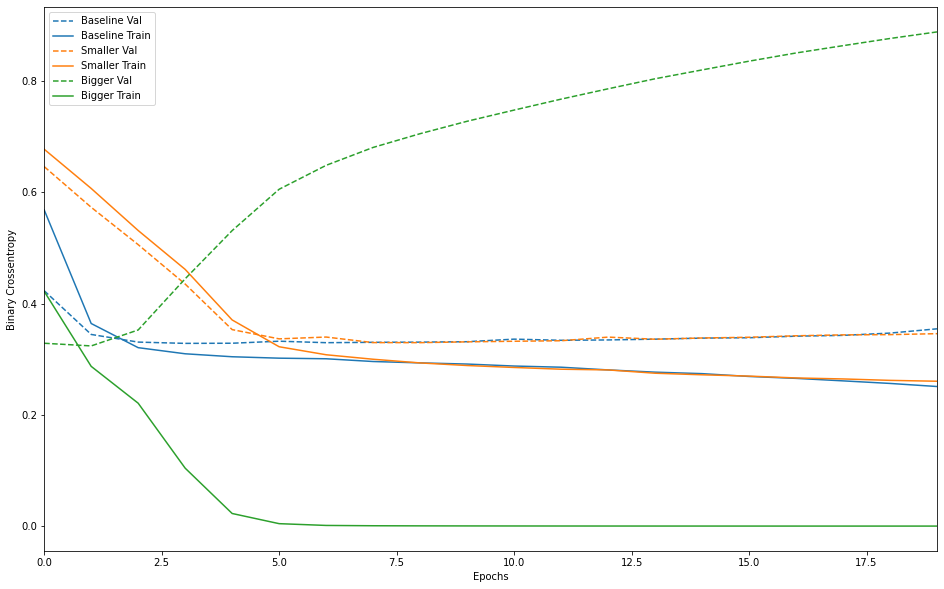

In [10]:
def plot_history(hitories, key="binary_crossentropy"):
    plt.figure(figsize=(16, 10))

    for name, history in hitories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+" Val")
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+" Train")
    plt.xlabel("Epochs")
    plt.ylabel(key.replace("_"," ").title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

plot_history([("baseline", baseline_history),
            ("smaller", smaller_history),
            ("bigger", bigger_history)])

In [12]:
l2_model = keras.models.Sequential([keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation="relu"),
keras.layers.Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "binary_crossentropy"])

l2_model_history = l2_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6327 - accuracy: 0.6950 - binary_crossentropy: 0.5892 - val_loss: 0.4848 - val_accuracy: 0.8164 - val_binary_crossentropy: 0.4440 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4177 - accuracy: 0.8429 - binary_crossentropy: 0.3774 - val_loss: 0.3894 - val_accuracy: 0.8519 - val_binary_crossentropy: 0.3496 - 380ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3639 - accuracy: 0.8650 - binary_crossentropy: 0.3249 - val_loss: 0.3737 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3356 - 382ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3474 - accuracy: 0.8727 - binary_crossentropy: 0.3100 - val_loss: 0.3651 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3287 - 413ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3414 - accuracy: 0.8746 - binary_crossentropy: 0.3057 - val_loss: 0.3639 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3291 - 333ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3368 - accuracy: 0.8752 - binary_cr

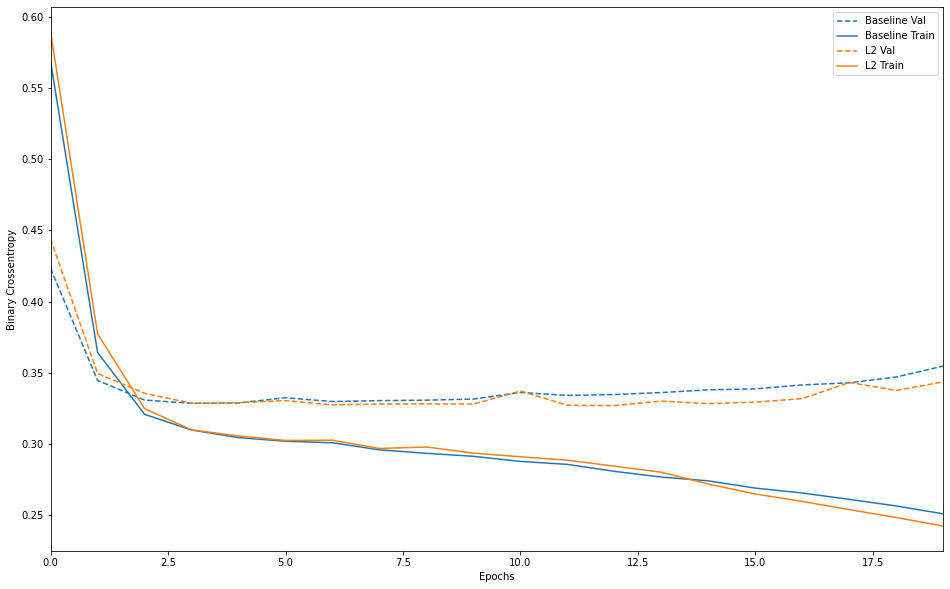

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6803 - accuracy: 0.5568 - binary_crossentropy: 0.6803 - val_loss: 0.6104 - val_accuracy: 0.7473 - val_binary_crossentropy: 0.6104 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5937 - accuracy: 0.6752 - binary_crossentropy: 0.5937 - val_loss: 0.4870 - val_accuracy: 0.8176 - val_binary_crossentropy: 0.4870 - 408ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5194 - accuracy: 0.7386 - binary_crossentropy: 0.5194 - val_loss: 0.4026 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.4026 - 380ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4682 - accuracy: 0.7703 - binary_crossentropy: 0.4682 - val_loss: 0.3688 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.3688 - 384ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4293 - accuracy: 0.8008 - binary_crossentropy: 0.4293 - val_loss: 0.3465 - val_accuracy: 0.8548 - val_binary_crossentropy: 0.3465 - 391ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4063 - accuracy: 0.8201 - binary_cr

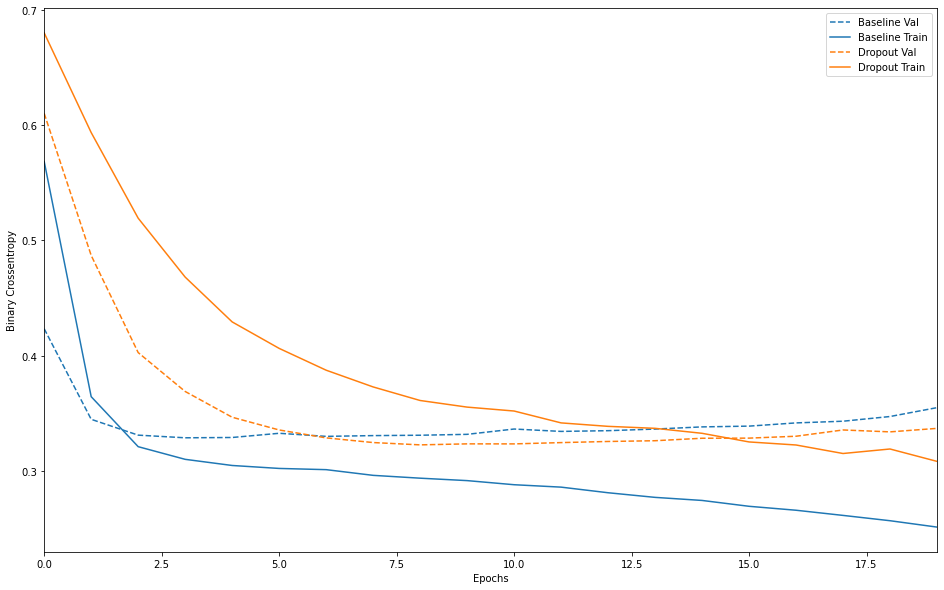

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [16]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.